In [24]:
class SimpleClass():
    def __init__(self):
        print("Hello")
    
    def yelling(self):
        print("YELLING")

In [25]:
s = "string"

In [26]:
s

'string'

In [27]:
type(s)

str

In [28]:
x = SimpleClass()

Hello


In [29]:
x.yelling()

YELLING


In [30]:
class ExtendClass(SimpleClass):
    def __init__(self):
        super().__init__()

In [31]:
y = ExtendClass()

Hello


In [32]:
y.yelling()

YELLING


In [33]:
##Operation
import numpy as np

In [34]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [35]:
class add(Operation):
    
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [36]:
class multiply(Operation):
    
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [37]:
class matmul(Operation):
    def __init__(self, x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

In [38]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [39]:
class Variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [40]:
class Graph():
    
    def __init__(self):
        
        self.operations =[]
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10
b = 1

z = 10x + 1

In [41]:
g = Graph()

In [42]:
g.set_as_default()

In [43]:
A = Variable(10)

In [44]:
b = Variable(1)

In [45]:
x = Placeholder()

In [46]:
y = multiply(A, x)

In [47]:
z = add(y, b)

In [48]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

In [49]:
class Session():
    
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                print("masuk sini")
                node.output = np.array(node.output)
            
        return operation.output

In [50]:
sess = Session()

In [51]:
result = sess.run(operation=z, feed_dict={x:10})

In [52]:
 result

101

In [53]:
g = Graph()

g.set_as_default()

A = Variable([[10,20], [30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [54]:
sess = Session()

In [55]:
sess.run(operation=z, feed_dict={x:10})

masuk sini
masuk sini


array([[101, 202],
       [301, 402]])

In [56]:
import matplotlib.pyplot as plt 
import numpy as np

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [58]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

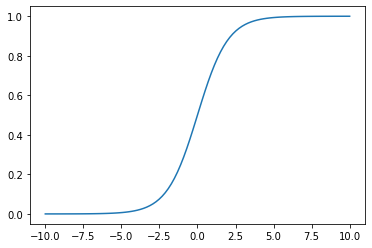

In [59]:
plt.plot(sample_z, sample_a)

In [108]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
    
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z_val))

In [109]:
from sklearn.datasets import make_blobs

In [110]:
data = make_blobs(n_samples = 50, n_features=2, centers = 2, random_state=75)

In [111]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [112]:
type(data)

tuple

In [113]:
features = data[0]
labels = data[1]

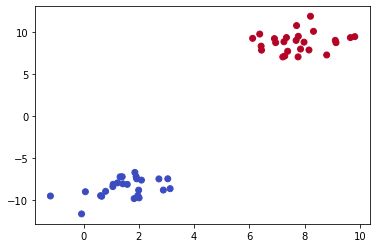

In [114]:
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

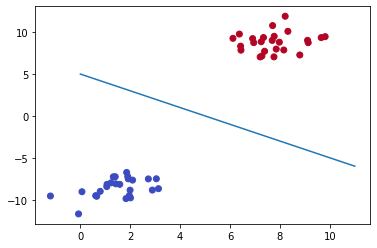

In [115]:
x = np.linspace(0, 11, 10)
y = -x + 5
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
plt.plot(x,y)

In [116]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [117]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [118]:
g = Graph()

In [119]:
g.set_as_default()

In [120]:
x = Placeholder()

In [121]:
w = Variable([1,1])

In [122]:
b = Variable(-5)

In [123]:
z = add(matmul(w,x), b)

In [124]:
a = Sigmoid(z)

In [125]:
sess = Session()

In [126]:
sess.run(operation=a, feed_dict={x:[8,10]})

masuk sini
masuk sini


0.999997739675702